# Obtención de áreas con ajuste de curvas para Oxigeno 1s, para análisis elemental de materiales.

## Antecedentes:
* En el proyecto anterior se realizo un ajuste polinomico a diferentes datos de elementos.

## Objetivos:

### Objetivos Generales:
* Continuar con el proyecto anterior realizando un mejor ajuste de curva polinómico a un conjunto de datos obtenidos por medio de espectroscopia de fotoemisión de rayos x, con un nuevo método de optimización y calcular el área bajo la curva para en un posterior momento obtener el porcentaje atómico de la muestra analizada.

### Objetivos Especificos:
* Importar correctamente los datos a ajustar.
* Ajustar los datos a polinomios a una nueva funcion polinomica.
* Encontrar una funcion de tercer orden para cada secccion a ajustar.
* Encontrar una funcion que pase por debajo de la curva con el objetivo de     encontrar por medio de resta de funciones, el area mas proximas bajo la       curva.
* Dividir la curva en tres secciones para obtener un area total con poca tasa   de error.
* Encontrar el Area bajo la curva de cada seccion.
* Sumar las areas seccionadas para obtener el Area total.

In [1]:
from scipy.optimize import curve_fit 
import sympy as sp
import numpy as np 
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
sp.init_printing(use_latex='mathjax')
sp.var('x', real=True)

x

In [2]:
dta = data = pd.read_csv('data_O1s.csv')
dta

,Energy,Counts/s
0,540.0,5385.6327
1,539.9,5377.0126
2,539.8,5445.4113
3,539.7,5378.0184
4,539.6,5371.6017
5,539.5,5441.8836
6,539.4,5382.8602
7,539.3,5341.9636
8,539.2,5305.2001
9,539.1,5411.0367


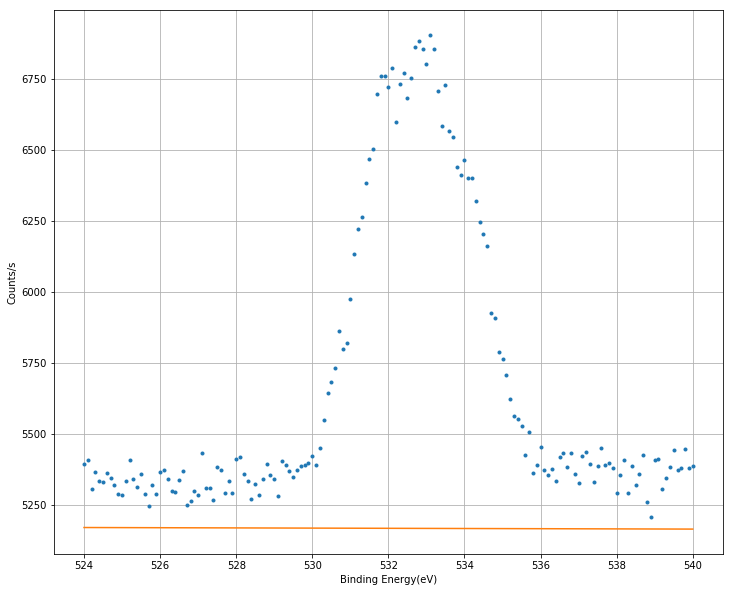

In [3]:
plt.figure(figsize=(12,10))
q = dta.values[:,0] #x
w = dta.values[:,1] #y
plt.plot(q, w, 'o', ms=3)
def f_2(q):
    return -0.34525625*q+5350
plt.plot(q, f_2(q), '-', ms=3)
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

# Se divide la funcion en 3 partes para una mejor aproximacion y calculo de area.

# -------------------------------------------------------------------------

# 1-Primera parte de la funcion

In [4]:
val1, val2=dta.values[92,0], dta.values[92,1]
val1, val2

(530.8, 5799.4053)

In [5]:
val3, val4=dta.values[160,0], dta.values[160,1]
val3, val4

(524.0, 5391.1568)

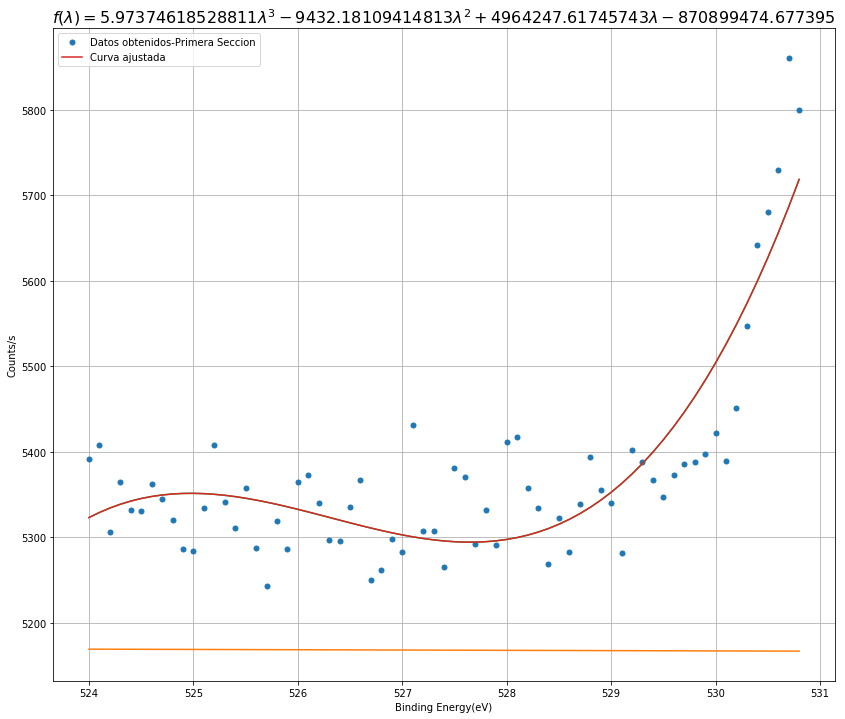

In [6]:
plt.figure(figsize=(14,12))
ya = dta.values[92:,1] # El segundo valor dentro del corchete se queda fijo
xa = dta.values[92:,0] # El rango de la funcion a integrar.
plt.plot(xa, ya, 'o', label="Datos obtenidos-Primera Seccion", ms=5)

def f_2(xa): #x
    return -0.34525625*xa+5350
plt.plot(xa, f_2(xa), '-', ms=3)

plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

def f1(xa, a, b, c, d):  # Esta funcion se puede ajustar 
    return a*xa**3 + b*xa**2 +c*xa + d 

popt, pcov = curve_fit(f1, xa, ya)

\
xs = sp.Symbol('\lambda')  
tex = sp.latex(f1(xs,*popt)).replace('$', '') 
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

plt.plot(xa, f1(xa, *popt))
plt.plot(xa, popt[0]*xa**3 + popt[1]*xa**2 + popt[2]*xa + popt[3], label="Curva ajustada")

plt.legend(loc='upper left') 
plt.show()

#   Al tener datos dijos que no son variables, la funcion que se creo a partir de estos datos, tambien son fijos
#   por lo tanto la funcion no cambiara, a menos que los datos cambien.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
def montecarlo1(f1_montecarlo ,aa, bb, N): #aa, bb
    u=(bb-aa)*np.random.rand(N)+aa
    return (bb-aa)*np.mean(f1_montecarlo(u))

In [9]:
def f1_montecarlo(xm1): 
    return ((5.97374618528811*xm1**3) - (9432.18109414813*xm1**2) + (4964247.61745743*xm1) - (870899474.677395) + 0.34525625*xm1 - 5350)
aa, bb = 524, 530.8
N = 100000
H = montecarlo1(f1_montecarlo,aa,bb,N)

In [10]:
aa, bb = 524, 530.8
N = np.logspace(1, 7, 7)

In [11]:

tabla1 = pd.DataFrame(index = N, columns=['Valor de Integrales'])

for n in N:
    tabla1.loc[n,'Valor de Integrales'] = montecarlo1(f1_montecarlo, aa, bb, n.astype(int))
tabla1

,Valor de Integrales
10.0,1465.1
100.0,1471.86
1000.0,1402.81
10000.0,1392.37
100000.0,1378.83
1000000.0,1380.25
10000000.0,1378.95


In [12]:
tabla1.values[6,0]

1378.9483752392564

# ---------------------------------------------------------------------------------------------------------------

# 2-Segunda parte de la funcion

In [13]:
 dta.values[93,0], dta.values[50,0]

(530.7, 535.0)

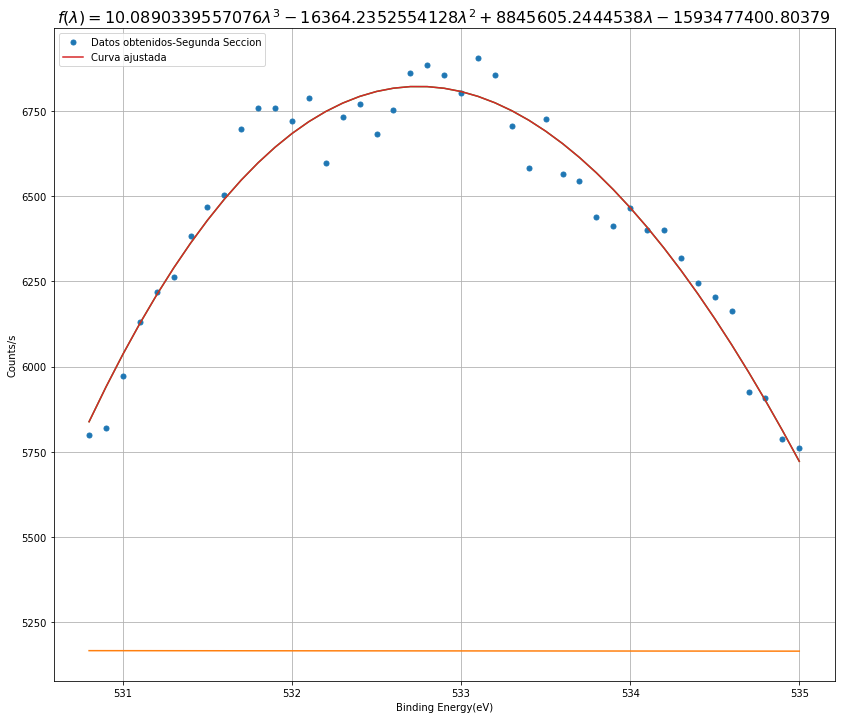

In [14]:
plt.figure(figsize=(14,12))
yb = dta.values[50:93,1] # El segundo valor dentro del corchete se queda fijo
xb = dta.values[50:93,0] 
plt.plot(xb, yb, 'o', label="Datos obtenidos-Segunda Seccion", ms=5)


plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

#-------------------------------------------------------------------------

def f_2(xb): #x
    return -0.34525625*xb+5350
plt.plot(xb, f_2(xb), '-', ms=3)

#--------------------------------------------------------------------------

def f2(xb, e, f, g, h): 
    return e*xb**3 + f*xb**2 +g*xb + h 

#--------------------------------------------------------------------------

popt, pcov = curve_fit(f2, xb, yb)

\
xd = sp.Symbol('\lambda')  #xs=xd
tex = sp.latex(f1(xd,*popt)).replace('$', '') 
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

#-------------------------------------------------------------------------


plt.plot(xb, f2(xb, *popt))
plt.plot(xb, popt[0]*xb**3 + popt[1]*xb**2 + popt[2]*xb + popt[3], label="Curva ajustada")

plt.legend(loc='upper left') 
plt.show()

In [15]:
def montecarlo2(f2_montecarlo , cc, dd, N): ## cc, dd
    i=(dd-cc)*np.random.rand(N)+cc #u=i
    return (dd-cc)*np.mean(f2_montecarlo(i))

In [16]:
def f2_montecarlo(xm2): 
    return ((10.0890339557076*xm2**3) - (16364.2352554128*xm2**2) + (8845605.2444538*xm2) - (1593477400.80379) + 0.34525625*xm2 - 5350)
cc, dd = 530.7, 535
N = 100000
J = montecarlo2(f2_montecarlo,cc,dd,N) #H=J

In [17]:
cc, dd = 530.7, 535
N = np.logspace(1, 7, 7)

In [18]:
tabla2 = pd.DataFrame(index = N, columns=['Valor de Integrales'])

for n in N:
    tabla2.loc[n,'Valor de Integrales'] = montecarlo2(f2_montecarlo, cc, dd, n.astype(int))
tabla2

,Valor de Integrales
10.0,6191.3
100.0,5517.7
1000.0,5481.9
10000.0,5562.65
100000.0,5544.6
1000000.0,5542.24
10000000.0,5541.32


In [19]:
tabla2.values[6,0]

5541.322402228141

# ---------------------------------------------------------------------------------------------------------------

# 3-Tercera parte de la funcion

In [20]:
 dta.values[51,0], dta.values[0,0]

(534.9, 540.0)

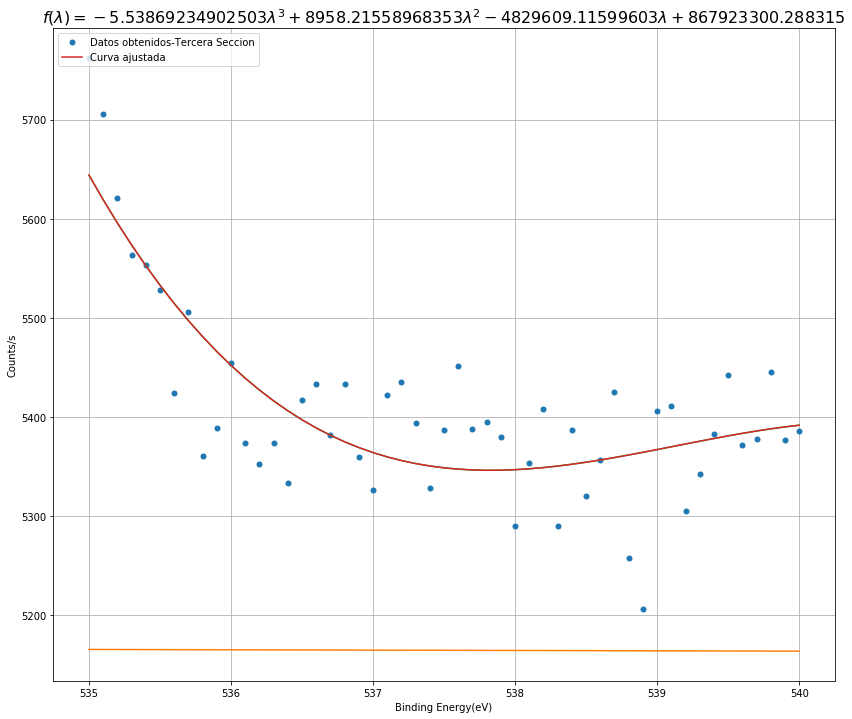

In [21]:
plt.figure(figsize=(14,12))
yc = dta.values[:51,1] # El segundo valor dentro del corchete se queda fijo
xc = dta.values[:51,0] 
plt.plot(xc, yc, 'o', label="Datos obtenidos-Tercera Seccion", ms=5)


plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

#-------------------------------------------------------------------------

def f_3(xc): #x
    return -0.34525625*xc+5350
plt.plot(xc, f_3(xc), '-', ms=3)

#--------------------------------------------------------------------------

def f3(xc, i, j, k, l): 
    return i*xc**3 + j*xc**2 +k*xc + l 

#--------------------------------------------------------------------------

popt, pcov = curve_fit(f3, xc, yc)

\
xf = sp.Symbol('\lambda')  #xd=xf
tex = sp.latex(f3(xf,*popt)).replace('$', '') 
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

#-------------------------------------------------------------------------


plt.plot(xc, f3(xc, *popt))
plt.plot(xc, popt[0]*xc**3 + popt[1]*xc**2 + popt[2]*xc + popt[3], label="Curva ajustada")

plt.legend(loc='upper left') 
plt.show()

In [22]:
def montecarlo3(f3_montecarlo , ee, ff, N): ## ee, ff
    o=(ff-ee)*np.random.rand(N)+ee #i=o
    return (ff-ee)*np.mean(f3_montecarlo(o))

In [23]:
def f3_montecarlo(xm3): 
    return ((-5.53869234902503*xm3**3) + (8958.21558968353*xm3**2) - (4829609.11599603*xm3) + (867923300.288315) + 0.34525625*xm3 - 5350)
ee, ff = 534.9, 540
N = 100000
J = montecarlo3(f3_montecarlo,ee,ff,N) #H=J

In [24]:
cc, dd = 534.9, 540
N = np.logspace(1, 7, 7)

In [25]:
tabla3 = pd.DataFrame(index = N, columns=['Valor de Integrales'])

for n in N:
    tabla3.loc[n,'Valor de Integrales'] = montecarlo3(f3_montecarlo, ee, ff, n.astype(int))
tabla3

,Valor de Integrales
10.0,1278.28
100.0,1249.99
1000.0,1263.68
10000.0,1250.05
100000.0,1251.74
1000000.0,1252.33
10000000.0,1251.78


In [26]:
tabla3.values[6,0]

1251.7812468113689

# --------------------------------------------------------------------------------------------------------------

# El area total de la curva respecto a la segunda funcion es la siguiente.

# Area 1

In [27]:
Area_total = tabla1.values[6,0] + tabla2.values[6,0]  + tabla3.values[6,0] 
Area_total

8172.052024278766

# --------------------------------------------------------------------------------------------------------------